# Video Games Sales with Ratings

# 1. **Introduction**
🎮 **It Predicts Video Game Sales Based on their Features**

This project aims to predict global video game sales using different machine learning regression models. The dataset includes information about games such as platform, genre, publisher, ratings, critic scores, and user scores. By training models on these features, the goal is to understand which factors influence sales and how accurately we can predict a game's performance. This project also compares multiple models to find the best one and includes clear visualisations to understand the results.

# 2. **Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 3. **Loading the Dataset**

In [2]:
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('/kaggle/input/video-games-sales-with-rating-prediction-datast/Video_Games_Sales_as_at_22_Dec_2016.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


# 4. **Data Exploration & Cleaning**

In [3]:
df = df.dropna(subset=['Global_Sales'])
df = df[df['Year_of_Release'] >= 1985]      
df.reset_index(drop=True, inplace=True)

# 5. **Select Features**

In [4]:
features = ['Platform', 'Genre', 'Publisher', 'Year_of_Release', 
            'Critic_Score', 'User_Score', 'Rating']

df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')
df['Critic_Score'] = pd.to_numeric(df['Critic_Score'], errors='coerce')

data = df[features + ['Global_Sales']]
data = data.dropna()

# 6. **Preprocessing**

In [5]:
X = data[features]
y = data['Global_Sales']

num_features = ['Year_of_Release', 'Critic_Score', 'User_Score']
cat_features = ['Platform', 'Genre', 'Publisher', 'Rating']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

# 7. **Train - Test Split**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 8. **Train 3 Models**

## Linear Regression

In [7]:
lr_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

lr_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year_of_Release',
                                                   'Critic_Score',
                                                   'User_Score']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Platform', 'Genre',
                                                   'Publisher', 'Rating'])])),
                ('model', LinearRegression())])

## Decision Tree

In [8]:
dt_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', DecisionTreeRegressor(max_depth=8, random_state=42))
])

dt_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year_of_Release',
                                                   'Critic_Score',
                                                   'User_Score']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Platform', 'Genre',
                                                   'Publisher', 'Rating'])])),
                ('model', DecisionTreeRegressor(max_depth=8, random_state=42))])

## Random Forest

In [9]:
rf_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42))
])

rf_model.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Year_of_Release',
                                                   'Critic_Score',
                                                   'User_Score']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Platform', 'Genre',
                                                   'Publisher', 'Rating'])])),
                ('model',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

# 9. Evaluation Function

In [10]:
def evaluate(model, X_train, X_test, y_train, y_test):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    results = {
        'MAE Train': mean_absolute_error(y_train, y_pred_train),
        'MAE Test': mean_absolute_error(y_test, y_pred_test),
        'RMSE Train': np.sqrt(mean_squared_error(y_train, y_pred_train)),
        'RMSE Test': np.sqrt(mean_squared_error(y_test, y_pred_test)),
        'R² Train': r2_score(y_train, y_pred_train),
        'R² Test': r2_score(y_test, y_pred_test)
    }

    return pd.DataFrame(results, index=[0])

# 10. Display Model Performance

In [11]:
print("Linear Regression:")
display(evaluate(lr_model, X_train, X_test, y_train, y_test))

print("Decision Tree:")
display(evaluate(dt_model, X_train, X_test, y_train, y_test))

print("Random Forest:")
display(evaluate(rf_model, X_train, X_test, y_train, y_test))

Linear Regression:


,MAE Train,MAE Test,RMSE Train,RMSE Test,R² Train,R² Test
0,0.73192,0.778283,1.847221,1.490215,0.175454,0.182849


Decision Tree:


,MAE Train,MAE Test,RMSE Train,RMSE Test,R² Train,R² Test
0,0.467671,0.706448,0.840168,2.78624,0.829427,-1.856548


Random Forest:


,MAE Train,MAE Test,RMSE Train,RMSE Test,R² Train,R² Test
0,0.211212,0.594678,0.626046,1.844467,0.905291,-0.251833


# 11. Visualisations

## Actual vs Predicted

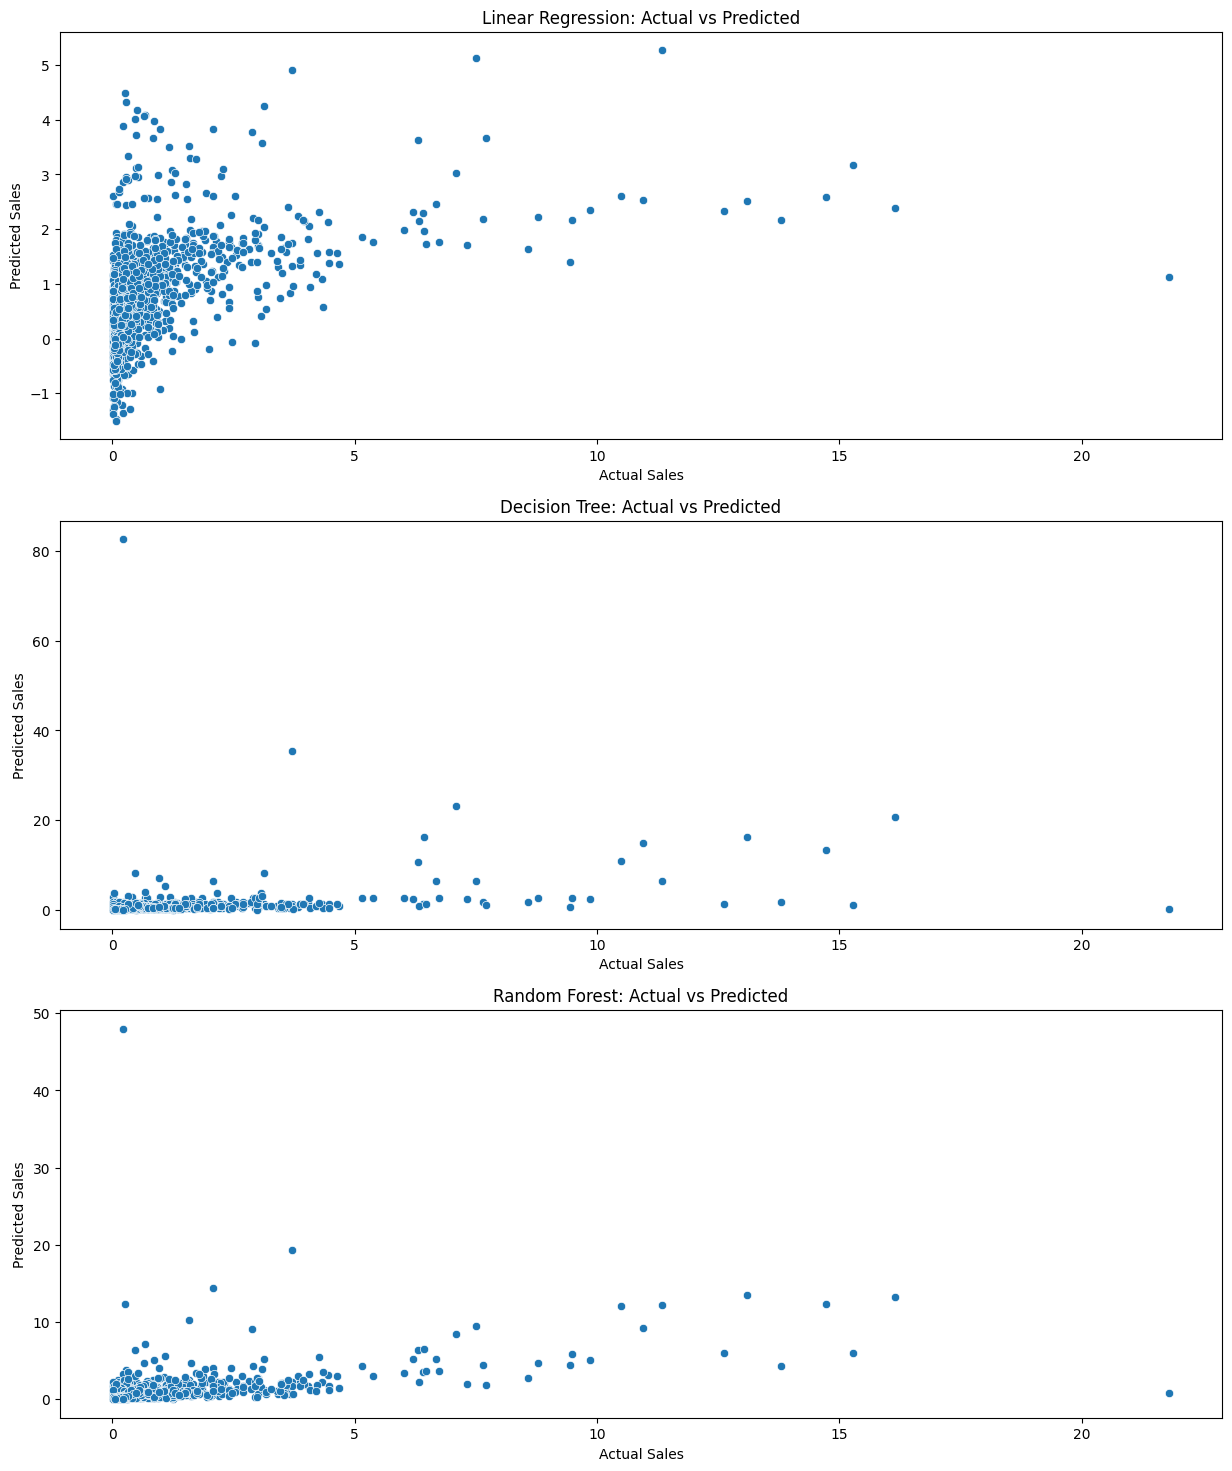

In [12]:
models = [('Linear Regression', lr_model),
          ('Decision Tree', dt_model),
          ('Random Forest', rf_model)]

plt.figure(figsize=(15, 18))

for i, (name, model) in enumerate(models):
    y_pred = model.predict(X_test)
    plt.subplot(3, 1, i+1)
    sns.scatterplot(x=y_test, y=y_pred)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title(f"{name}: Actual vs Predicted")

## Residual Error Plots

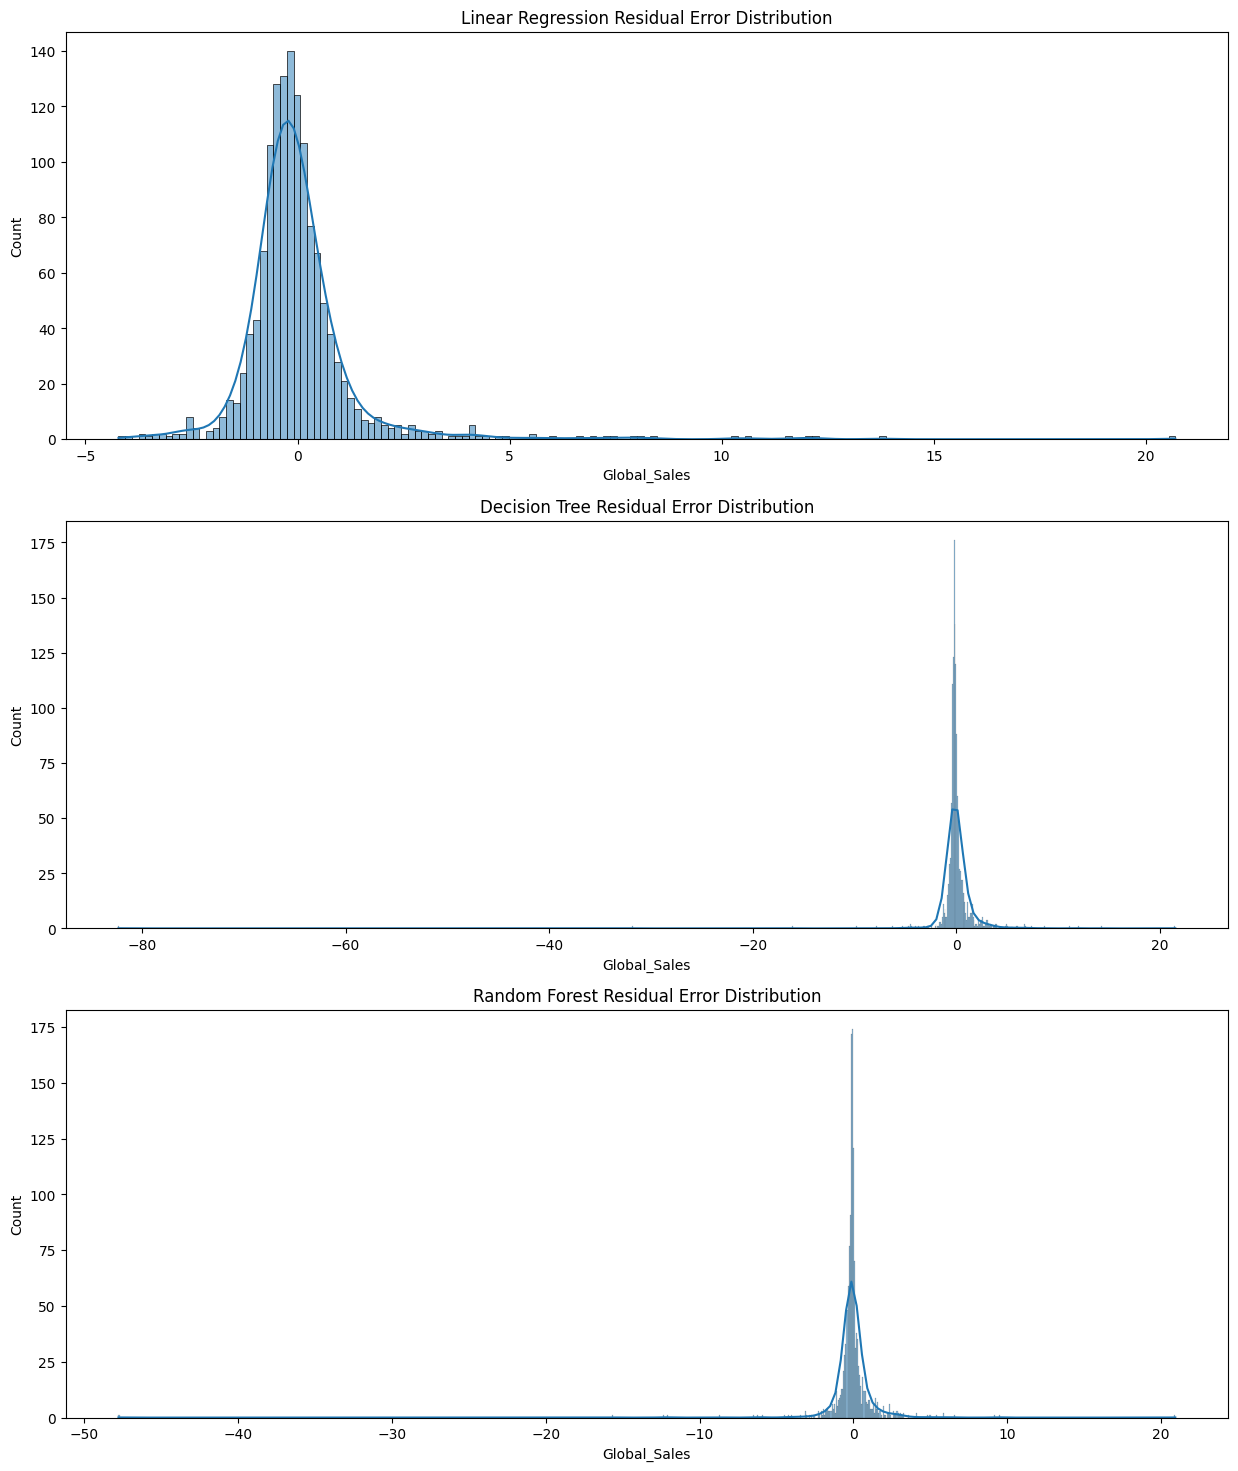

In [13]:
plt.figure(figsize=(15, 18))

for i, (name, model) in enumerate(models):
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred
    plt.subplot(3, 1, i+1)
    sns.histplot(residuals, kde=True)
    plt.title(f"{name} Residual Error Distribution")

## Feature Importance (Random Forest)

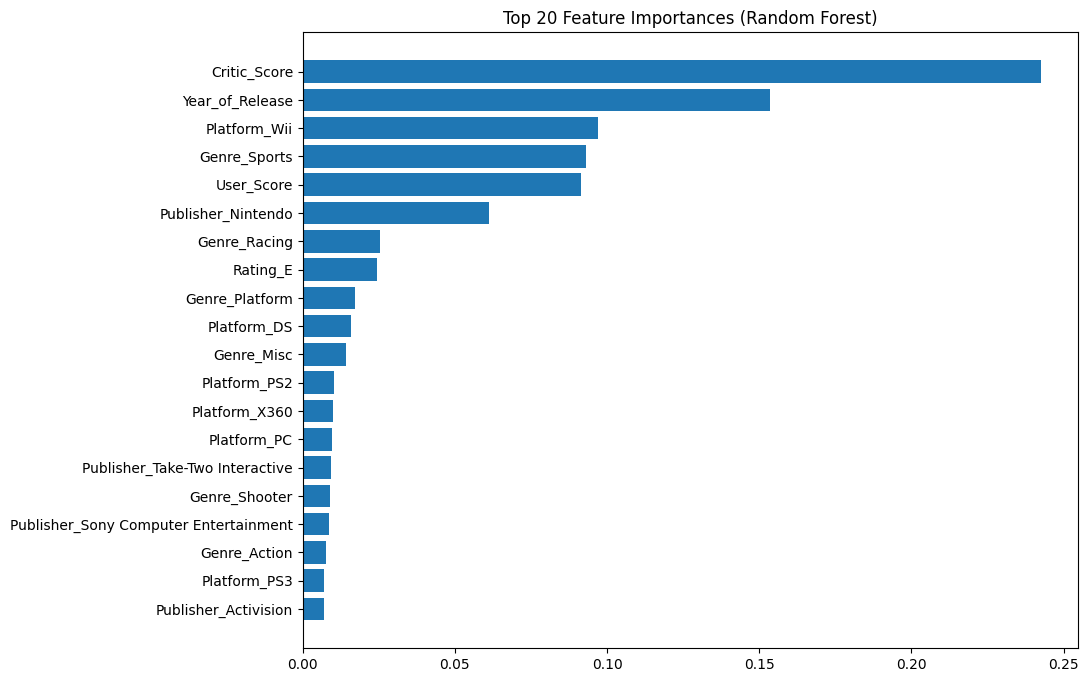

In [14]:
rf = rf_model.named_steps['model']
ohe = rf_model.named_steps['preprocess'].named_transformers_['cat']
encoded_cat = ohe.get_feature_names_out(cat_features)

all_features = np.concatenate([num_features, encoded_cat])

importances = rf.feature_importances_
sorted_idx = np.argsort(importances)[-20:]

plt.figure(figsize=(10, 8))
plt.barh(all_features[sorted_idx], importances[sorted_idx])
plt.title("Top 20 Feature Importances (Random Forest)")
plt.show()